<h1><center> Домашняя работа #1</center></h1>

Задача:

- реализовать один из алгоритмов RL (рекомендуем Q-learning, a.k.a. SARSAMAX);
- реализовать логику обучения агента используя среду из Gymnasium;
- решить задачу Taxi-v3; -
- сделать небольшой отчет об обучении агента (графики награды)

Примечания:

- расчитывайте суммарную награду и среднюю награду за последние 100 эпизодов;
- результат должен содержать исходный код агента, сохраненного агента, графики награды в процессе обучения агента.

Описание задачи на сайте Gymnasium ([ссылка](https://gymnasium.farama.org/environments/toy_text/taxi/))

## Imports

In [1]:
import sys

sys.path.append("..")

In [2]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
%load_ext autoreload
%autoreload 2

from src.model_free_agorithms import train_with_q_learning

## Environment

**Initial state:**

Calculated as ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

- taxi_row, taxi_col: coordinates of your taxi (0-4)
- passenger_location:
  · 0: at R(ed)
  · 1: at G(reen)
  · 2: at Y(ellow)
  · 3: at B(lue)
  · 4: in taxi
- destination:
  · 0: R(ed)
  · 1: G(reen)
  · 2: Y(ellow)
  · 3: B(lue)

**Actions:**

- 0: Move south (down)
- 1: Move north (up)
- 2: Move east (right)
- 3: Move west (left)
- 4: Pickup passenger
- 5: Drop off passenger

**Rewards:**

- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

Source: [link](https://gymnasium.farama.org/environments/toy_text/taxi/)

In [4]:
env = gym.make(
    "Taxi-v3",
    is_rainy=False,
    fickle_passenger=False,
    max_episode_steps=1_000,
    # render_mode="human"  # Раскомментируйте, чтобы увидеть игру
)

In [5]:
initial_state, info = env.reset()

In [6]:
taxi_row, taxi_col, passenger_loc, destination = env.unwrapped.decode(initial_state)

print(
    f"""
    {initial_state=}
    {taxi_row=}
    {taxi_col=}
    {passenger_loc=}
    {destination=}
"""
)


    initial_state=401
    taxi_row=4
    taxi_col=0
    passenger_loc=0
    destination=1



## Model

Q-leaning 

$$\begin{align*}
Q(s, a) &\leftarrow Q(s, a) + \alpha \delta \\
\text{where } \delta &= R(s, a) + \gamma \max_{a'} Q(s', a') - Q(s, a) \\
\\
\text{and } & s \text{ - current state} \\
& a \text{ - current action} \\
& s' \text{ - next state} \\
& \alpha \text{ - learning rate } (0 \leq \alpha \leq 1) \\
& \gamma \text{ - discount factor } (0 \leq \gamma \leq 1) \\
& R(s, a) \text{ - immediate reward}
\end{align*}$$

In [7]:
# Основные параметры
alpha = 0.1  # learning_rate
gamma = 0.6  # discount_factor
epsilon = 0.1  # probability of random action

n_epochs = 100_000

In [8]:
q_table, rewards = train_with_q_learning(
    env=env,
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    exploratory_period=2_000,
    n_epochs=n_epochs,
    print_every=5_000,
)

  0%|                                                                               | 5/100000 [00:00<37:53, 43.98it/s]

episode=0 reward -1930,  # penalties 160, # steps 511


  5%|████                                                                      | 5414/100000 [01:05<00:51, 1839.46it/s]

episode=5000 reward -5,  # penalties 1, # steps 17


 10%|███████▌                                                                 | 10299/100000 [01:09<01:04, 1388.71it/s]

episode=10000 reward 4,  # penalties 0, # steps 17


 15%|███████████                                                              | 15171/100000 [01:14<01:05, 1290.03it/s]

episode=15000 reward 7,  # penalties 0, # steps 14


 20%|██████████████▋                                                          | 20197/100000 [01:18<01:08, 1169.37it/s]

episode=20000 reward -7,  # penalties 1, # steps 19


 25%|██████████████████▍                                                      | 25252/100000 [01:22<00:52, 1428.70it/s]

episode=25000 reward 5,  # penalties 0, # steps 16


 30%|██████████████████████                                                   | 30246/100000 [01:25<00:58, 1188.65it/s]

episode=30000 reward 7,  # penalties 0, # steps 14


 35%|█████████████████████████▋                                               | 35196/100000 [01:30<00:57, 1127.61it/s]

episode=35000 reward 9,  # penalties 0, # steps 12


 40%|█████████████████████████████▎                                           | 40102/100000 [01:35<00:51, 1166.79it/s]

episode=40000 reward 6,  # penalties 0, # steps 15


 45%|█████████████████████████████████                                        | 45307/100000 [01:39<00:36, 1515.29it/s]

episode=45000 reward 7,  # penalties 0, # steps 14


 50%|████████████████████████████████████▋                                    | 50181/100000 [01:43<00:32, 1511.91it/s]

episode=50000 reward 1,  # penalties 0, # steps 20


 55%|████████████████████████████████████████▍                                | 55407/100000 [01:47<00:24, 1790.99it/s]

episode=55000 reward 5,  # penalties 0, # steps 16


 60%|███████████████████████████████████████████▉                             | 60204/100000 [01:51<00:37, 1073.00it/s]

episode=60000 reward 5,  # penalties 0, # steps 16


 65%|███████████████████████████████████████████████▋                         | 65255/100000 [01:54<00:19, 1807.40it/s]

episode=65000 reward -1,  # penalties 1, # steps 13


 70%|███████████████████████████████████████████████████▎                     | 70319/100000 [01:57<00:15, 1924.68it/s]

episode=70000 reward 6,  # penalties 0, # steps 15


 75%|███████████████████████████████████████████████████████▋                  | 75209/100000 [02:00<00:24, 993.24it/s]

episode=75000 reward 3,  # penalties 0, # steps 18


 80%|██████████████████████████████████████████████████████████▌              | 80156/100000 [02:04<00:11, 1765.69it/s]

episode=80000 reward 13,  # penalties 0, # steps 8


 85%|██████████████████████████████████████████████████████████████▏          | 85159/100000 [02:08<00:12, 1235.29it/s]

episode=85000 reward 6,  # penalties 0, # steps 15


 90%|█████████████████████████████████████████████████████████████████▊       | 90150/100000 [02:11<00:06, 1638.36it/s]

episode=90000 reward 6,  # penalties 0, # steps 15


 95%|█████████████████████████████████████████████████████████████████████▌   | 95256/100000 [02:14<00:03, 1484.80it/s]

episode=95000 reward 9,  # penalties 0, # steps 12


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:17<00:00, 726.39it/s]


In [9]:
with open("hw_1_trained_agent.pkl", "wb") as f:
    pickle.dump(q_table, f)

## Training graphs

In [10]:
table = pd.DataFrame(rewards, columns=["reward", "penalty", "steps"])
table = table.iloc[2_000:, :]  # remove exploratory_period

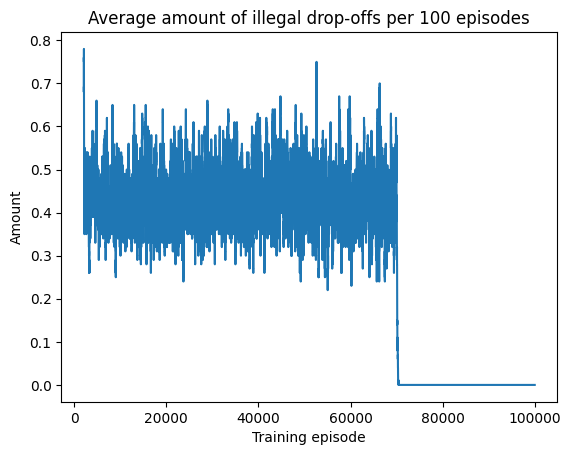

In [11]:
plt.plot(table.index, table["penalty"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average amount of illegal drop-offs per 100 episodes")
plt.show()

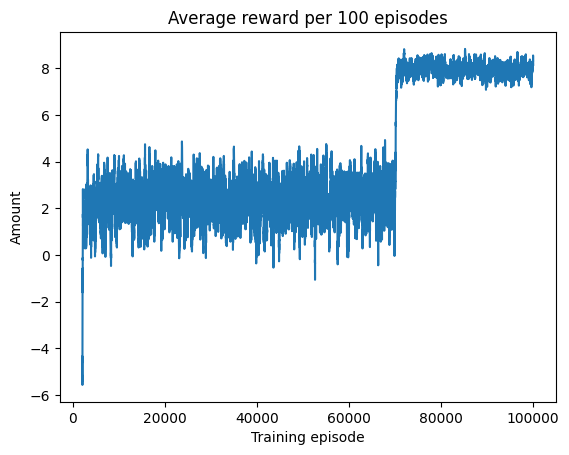

In [12]:
plt.plot(table.index, table["reward"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average reward per 100 episodes")
plt.show()

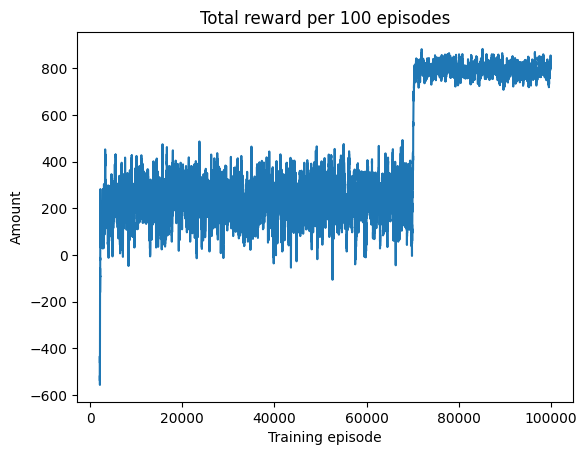

In [13]:
plt.plot(table.index, table["reward"].rolling(100).sum())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Total reward per 100 episodes")
plt.show()

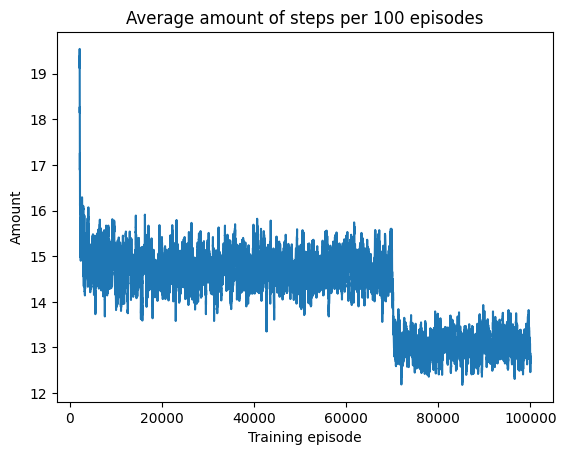

In [14]:
plt.plot(table.index, table["steps"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average amount of steps per 100 episodes")
plt.show()

## Анимация

In [15]:
with open("hw_1_trained_agent.pkl", "rb") as f:
    q_table = pickle.load(f)

In [16]:
env = gym.make(
    "Taxi-v3",
    is_rainy=False,
    fickle_passenger=False,
    max_episode_steps=1_00,
    render_mode="human",  # Раскомментируйте, чтобы увидеть игру
)

In [17]:
# https://github.com/openai/gym/issues/741#issuecomment-778703878
done = False
score = 0
state, _ = env.reset()
example_steps = 10

while not done:
    env.render()  # Раскомментируйте, чтобы увидеть игру
    action = np.argmax(q_table[state, :])
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    score += reward

env.close()

print(f"Score is: {score}")

Score is: 8
